## Chapter 16 RTD's Example 16-2

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [6]:
 def ODEfun(t,Yfuncvec):
    A = Yfuncvec[0]
    F = Yfuncvec[1]
    tm = Yfuncvec[2]
    Area=50.8038534 #(from Example 16-1)
    Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
    Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
    
    if t > 4:
        C=Cdown
    else:
        C=Cup
    E=C/Area
    dAdt = C
    dFdt = E
    dtmdt= t*E
    
    
    dYfuncvecdt = [dAdt,dFdt,dtmdt] 
    return dYfuncvecdt

In [7]:
#test of function ODEfun with the addition of Qx
tspan = [0,14] # Range for the independent variable 
y0 = [0,0,0] # Initial values for the dependent variables
sol=ODEfun(0,y0)
print (sol) #this should give the constant from Cup=0
print(y0)

[0.0, 0.0, 0.0]
[0, 0, 0]


In [8]:
sol=solve_ivp(ODEfun,tspan,y0,rtol=1e-6)#solve the ODE with rtol=1e-6 to match the analytical solution
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 152
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.06174378e+00, 2.01440921e+00, 2.98495520e+00,
       3.57659161e+00, 3.85201177e+00, 3.99064657e+00, 4.12928138e+00,
       4.28911237e+00, 5.56205933e+00, 7.03285511e+00, 8.63222011e+00,
       1.03353544e+01, 1.18238798e+01, 1.31586326e+01, 1.40000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 1.40702369e-09, 1.70883452e-07, 1.80447490e-05,
        2.44454476e-03, 7.04518183e-01, 3.80388733e+00, 1.01303989e+01,
        1.53481007e+01, 1.80115621e+01, 1.93859296e+01, 2.07576756e+01,
        2.22970680e+01, 3.26890944e+01, 4.06031474e+01, 4.56337823e+01,
        4.88040707e+01, 5.03824911e+01, 5.08264373e+01, 5.08049136e+01],
       [0.00000000e+00, 2.76952160e-11, 3.36359233e-09, 3.55184652e-07,
     

In [15]:
### This will print a table of 20 values
print('                     Summary of Results\n')
cdata=[0,0.6,1.4,5,8,10,8,6,4,3,2.2,1.5,0.6,0]
tdata=[0,0.5,1,2,3,4,5,6,7,8,9,10,12,14]

numrows=20
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,rtol=1e-6)

print('tm = {:6.5f} min \n'.format (sol.y[2][-1]))

print(' t           E          F      ')
print('(min)   (g/m^3/min)  (g/m^3/min) ')
E=np.zeros(numrows)

CupINT = -0.2545*(4**4)/4 + 1.5711*(4**3)/3+ 0.2813*(4**2)/2
CdownINT= 0.000845965*(14**6-4**6)/6 - 0.0386653*(14**5-4**5)/5 + 0.670963*(14**4-4**4)/4 - 5.36165*(14**3-4**3)/3 + 17.8271*(14**2-4**2)/2 - 9.42959*(14-4)
Area=CupINT+CdownINT

row=0
for row in range(numrows):
    t=sol.t[row]   
    if (t > 4): 
        Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
        E[row]=Cdown/sol.y[0,-1]
    else:
        Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
        E[row]=Cup/sol.y[0,-1]
    print('{:6.3f}   {:10.3e} {:10.3e}  '.format(sol.t[row],E[row],sol.y[1,row] ))



                     Summary of Results

tm = 5.07160 min 

 t           E          F      
(min)   (g/m^3/min)  (g/m^3/min) 
 0.000    0.000e+00  0.000e+00  
 0.737    1.887e-02  5.258e-03  
 1.474    5.929e-02  3.310e-02  
 2.211    1.092e-01  9.497e-02  
 2.947    1.567e-01  1.935e-01  
 3.684    1.896e-01  3.223e-01  
 4.421    1.816e-01  4.632e-01  
 5.158    1.510e-01  5.859e-01  
 5.895    1.204e-01  6.857e-01  
 6.632    9.348e-02  7.643e-01  
 7.368    7.177e-02  8.248e-01  
 8.105    5.550e-02  8.714e-01  
 8.842    4.383e-02  9.077e-01  
 9.579    3.528e-02  9.367e-01  
10.316    2.821e-02  9.601e-01  
11.053    2.124e-02  9.783e-01  
11.789    1.369e-02  9.912e-01  
12.526    5.977e-03  9.985e-01  
13.263    1.046e-04  1.000e+00  
14.000    5.900e-05  1.000e+00  


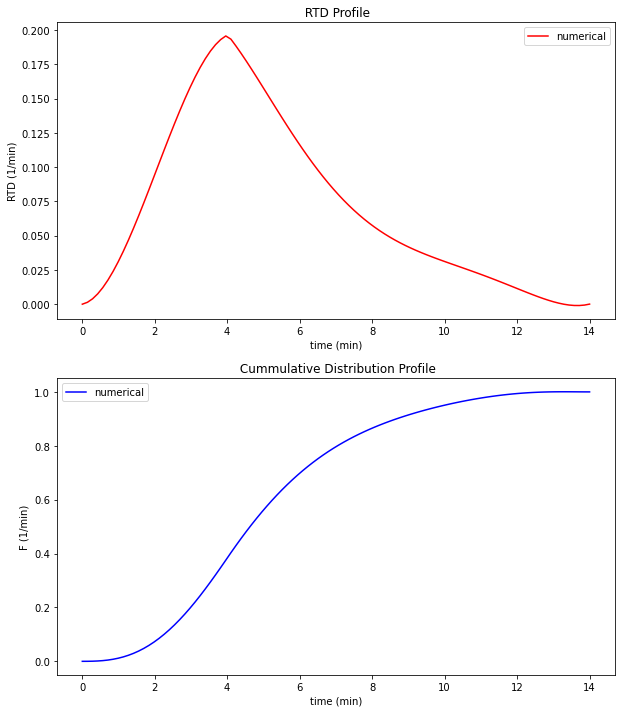

In [14]:
### This is for graph production
cdata=[0,0.6,1.4,5,8,10,8,6,4,3,2.2,1.5,0.6,0]
tdata=[0,0.5,1,2,3,4,5,6,7,8,9,10,12,14]

numrows=100
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,rtol=1e-6)

E=np.zeros(numrows)

row=0
for row in range(numrows):
    t=sol.t[row]   
    if (t > 4): 
        Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
        E[row]=Cdown/sol.y[0,-1]
    else:
        Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
        E[row]=Cup/sol.y[0,-1]



#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)

plt.plot(sol.t,E,':r', label='numerical', linestyle='solid')


plt.title(' RTD Profile')
plt.xlabel('time (min)')
plt.ylabel('RTD (1/min)')
plt.legend()

plt.subplot (2,1,2)

plt.plot(sol.t,sol.y[1],':b', label='numerical', linestyle='solid')

plt.title(' Cummulative Distribution Profile')
plt.xlabel('time (min)')
plt.ylabel('F (1/min)')
plt.legend()


In [17]:
 def ODEfunVar(t,Yfuncvec):
    Sigma2 = Yfuncvec[0]
    
    tm = 5.07160
    Area=50.8038534 #(from Example 16-1)
    Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
    Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
    
    if t > 4:
        C=Cdown
    else:
        C=Cup
    E=C/Area
    
    dsigma2dt=(t-tm)**2*E
    
    
    
    dYfuncvecdt = [dsigma2dt] 
    return dYfuncvecdt

In [20]:
solVar=solve_ivp(ODEfunVar,tspan,y0,rtol=1e-6)
print('Variance^2 = {:6.5f} min \nVariance = {:6.5f} min \n'.format (solVar.y[0][-1],solVar.y[0][-1]**0.5))

Variance^2 = 6.02780 min 
Variance = 2.45516 min 

